#### Basic Inference Process based on Free Energy Principle

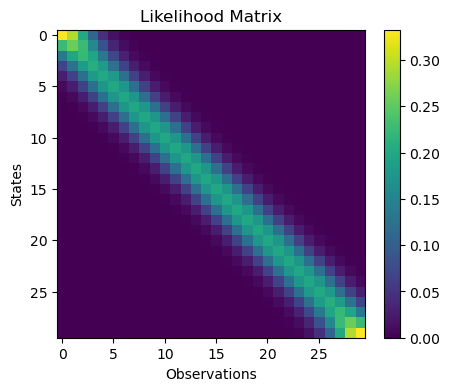

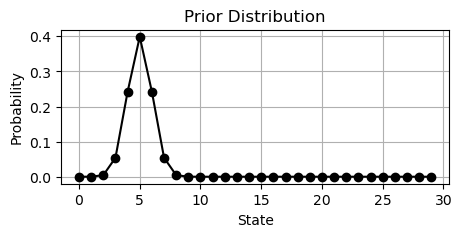

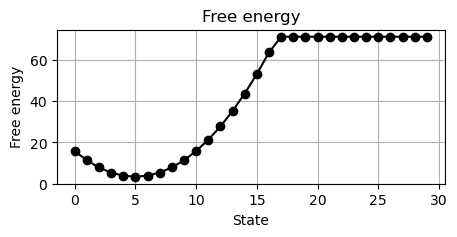

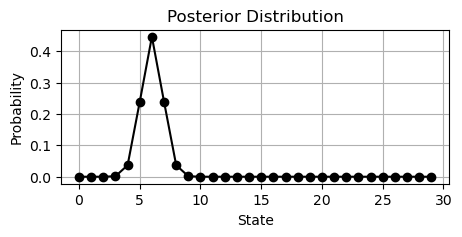

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create likelihood matrix
def create_likelihood_matrix(size, ambiguity):
    matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            distance = abs(i - j)
            matrix[i, j] = np.exp(-0.5 * (distance / ambiguity) ** 2)
    norm_matrix = matrix / matrix.sum(axis=1, keepdims=True)
    return norm_matrix

# Helper function to prevent log(0)
def log_stable(x, minval=1e-30):
    return np.log(np.maximum(x, minval))

# Softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Get approximate posterior
def infer_states(observation_index, likelihood_matrix, prior):
    log_likelihood = log_stable(likelihood_matrix[observation_index, :])
    log_prior = log_stable(prior)
    qs = softmax(log_likelihood + log_prior)
    return qs

# KL divergence
def kl_divergence(p, q):
    return (log_stable(p) - log_stable(q)).dot(p)

# Construct prior
def get_prior(prior_state, size, ambiguity):
    prior = np.zeros(size)
    for i in range(size):
        distance = abs(i - prior_state)
        prior[i] = np.exp(-0.5 * (distance / ambiguity) ** 2)
    norm_prior = prior / prior.sum()
    return norm_prior

size = 30
decay1, decay2 = [2, 1]
likelihood_matrix = create_likelihood_matrix(size, decay1)
prior = get_prior(5, size,decay2)
obs_idx = 10

#calculate actual free energy
qs = infer_states(obs_idx, likelihood_matrix, prior)
dkl = kl_divergence(qs,likelihood_matrix[obs_idx,:])
evidence = log_stable(prior)
F = dkl - evidence

# Visualization of likelihood
plt.figure(figsize=(5, 4))
plt.imshow(likelihood_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Likelihood Matrix')
plt.xlabel('Observations')
plt.ylabel('States')
plt.show()

# Visualization of prior
plt.figure(figsize=(5, 2))
plt.plot(prior, marker='o', linestyle='-', color='black')
plt.title(f'Prior Distribution')
plt.xlabel('State')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Visualization of free energy
plt.figure(figsize=(5, 2))
plt.plot(F, marker='o', linestyle='-', color='black')
plt.title(f'Free energy')
plt.xlabel('State')
plt.ylabel('Free energy')
plt.grid(True)
plt.show()


# Visualization of posterior
plt.figure(figsize=(5, 2))
plt.plot(qs, marker='o', linestyle='-', color='black')
plt.title(f'Posterior Distribution')
plt.xlabel('State')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In the first cell, we show a basic process of Bayesian inference based on free energy principle. Take symbolic identification as example, the subject owns prior on his position in the social, and continously modify it (posterior) according to observations. There are four parameters influencing this process: 

prior: subject's belief of current position; 

observation: life event subject encounters which challenges current belief; 

ambiguity 1: ability of reality check or ambiguity of reality; 

ambiguity 2: ambiguity of prior. 

We can explore how these parameters influences the free energy emerges from life event via the following interactive module.

In [2]:
from ipywidgets import interact, FloatSlider, IntSlider

@interact
def interactive_model(prior_state=IntSlider(min=0, max=29, step=1, value=30),
                      ambiguity1=FloatSlider(min=0.1, max=5, step=0.1, value=2),
                      ambiguity2=FloatSlider(min=0.1, max=5, step=0.1, value=1),
                      observation=IntSlider(min=0, max=29, step=1, value=5)):
    size = 30
    obs_idx = observation
    likelihood_matrix = create_likelihood_matrix(size, ambiguity1)
    prior = get_prior(prior_state, size, ambiguity2)
    qs = infer_states(obs_idx, likelihood_matrix, prior)
    dkl = kl_divergence(qs, likelihood_matrix[obs_idx, :])
    evidence = np.log(prior[obs_idx])
    F = dkl - evidence

    print(f"Free Energy: {F}")

    #visualization of likelihood
    plt.figure(figsize=(5, 4))
    plt.imshow(likelihood_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Likelihood Matrix')
    plt.xlabel('Observations')
    plt.ylabel('States')
    plt.show()

    #visualization of prior
    plt.figure(figsize=(5, 2))
    plt.plot(prior, marker='.', linestyle='-', color='black')
    plt.title('Prior Distribution')
    plt.xlabel('State')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(5, 2))
    plt.plot(qs, marker='.', linestyle='-', color='black')
    plt.title('Posterior Distribution')
    plt.xlabel('State')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()

interactive(children=(IntSlider(value=29, description='prior_state', max=29), FloatSlider(value=2.0, descripti…

#### Impact of mismatch on free energy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


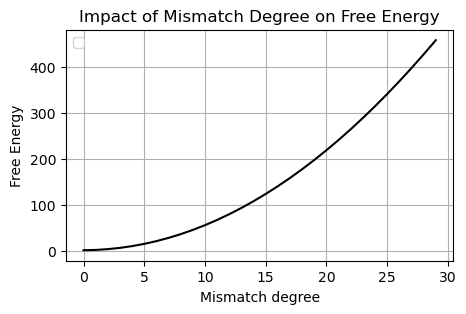

In [3]:
size = 30
decay1 = 3
decay2 = 1
likelihood_matrix = create_likelihood_matrix(size, decay1)
prior = get_prior(0, size, decay2)
obs_idx = [i for i in range(size)]
free_energies = []

# Calculate free energy for each observation
for obs in obs_idx:
    qs = infer_states(obs, likelihood_matrix, prior)
    dkl = kl_divergence(qs, likelihood_matrix[obs, :])
    evidence = np.log(prior[obs])
    F = dkl - evidence
    free_energies.append(F)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(obs_idx, free_energies, color = 'black')
plt.xlabel('Mismatch degree')
plt.ylabel('Free Energy')
plt.title('Impact of Mismatch Degree on Free Energy')
plt.legend()
plt.grid(True)
plt.show()

#### Impact of ambiguity of priors on free energy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


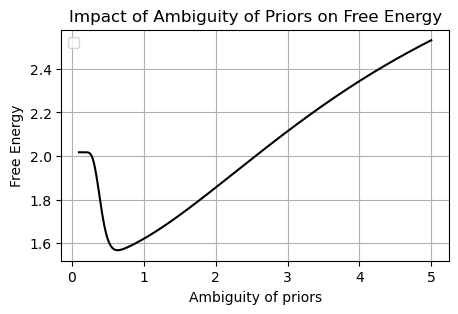

In [4]:
size = 30
decay1 = 3
likelihood_matrix = create_likelihood_matrix(size, decay1)
obs_idx = 10
decay2_values = np.linspace(0.1, 5, 1000)
free_energies = []

# Calculate free energy for each decay2 value
for decay2 in decay2_values:
    prior = get_prior(10, size, decay2)
    qs = infer_states(obs_idx, likelihood_matrix, prior)
    dkl = kl_divergence(qs, likelihood_matrix[obs_idx, :])
    evidence = np.log(prior[obs_idx])
    F = dkl - evidence
    free_energies.append(F)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(decay2_values, free_energies, color='black')
plt.xlabel('Ambiguity of priors')
plt.ylabel('Free Energy')
plt.title('Impact of Ambiguity of Priors on Free Energy')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\lilin\AppData\Local\Temp\ipykernel_24116\1090456768.py:13: RuntimeWarning: divide by zero encountered in log
  evidence = np.log(prior[obs_idx])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


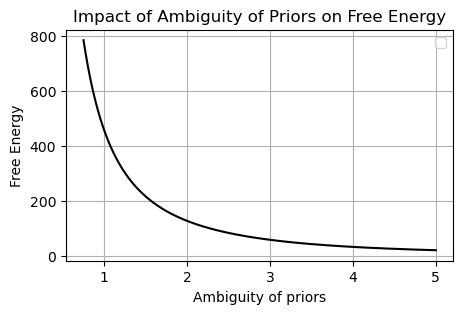

In [5]:
size = 30
decay1 = 3
likelihood_matrix = create_likelihood_matrix(size, decay1)
obs_idx = 0
decay2_values = np.linspace(0.1, 5, 1000)
free_energies = []

# Calculate free energy for each decay2 value
for decay2 in decay2_values:
    prior = get_prior(29, size, decay2)
    qs = infer_states(obs_idx, likelihood_matrix, prior)
    dkl = kl_divergence(qs, likelihood_matrix[obs_idx, :])
    evidence = np.log(prior[obs_idx])
    F = dkl - evidence
    free_energies.append(F)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(decay2_values, free_energies, color='black')
plt.xlabel('Ambiguity of priors')
plt.ylabel('Free Energy')
plt.title('Impact of Ambiguity of Priors on Free Energy')
plt.legend()
plt.grid(True)
plt.show()

#### Impact of ambiguity of likelihood on free energy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


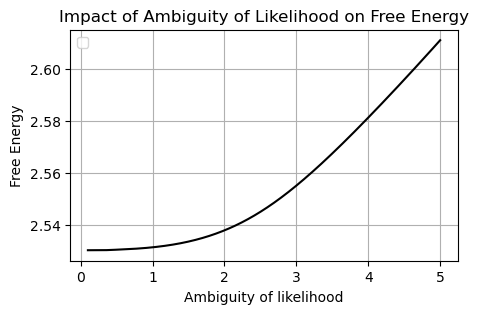

In [6]:
size = 30
prior = get_prior(10, size, decay2)
decay2 = 1
obs_idx = 9
decay1_values = np.linspace(0.1, 5, 1000)
free_energies = []

# Calculate free energy for each decay1 value
for decay1 in decay1_values:
    likelihood_matrix = create_likelihood_matrix(size, decay1)
    qs = infer_states(obs_idx, likelihood_matrix, prior)
    dkl = kl_divergence(qs, likelihood_matrix[obs_idx, :])
    evidence = np.log(prior[obs_idx])
    F = dkl - evidence
    free_energies.append(F)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(decay2_values, free_energies, color='black')
plt.xlabel('Ambiguity of likelihood')
plt.ylabel('Free Energy')
plt.title('Impact of Ambiguity of Likelihood on Free Energy')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


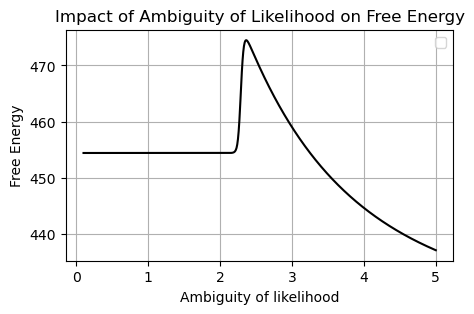

In [7]:
size = 30
prior = get_prior(0, size, decay2)
decay2 = 1
obs_idx = 29
decay1_values = np.linspace(0.1, 5, 1000) 
free_energies = []

# Calculate free energy for each decay1 value
for decay1 in decay1_values:
    likelihood_matrix = create_likelihood_matrix(size, decay1)
    qs = infer_states(obs_idx, likelihood_matrix, prior)
    dkl = kl_divergence(qs, likelihood_matrix[obs_idx, :])
    evidence = np.log(prior[obs_idx])
    F = dkl - evidence
    free_energies.append(F)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(decay2_values, free_energies, color='black')
plt.xlabel('Ambiguity of likelihood')
plt.ylabel('Free Energy')
plt.title('Impact of Ambiguity of Likelihood on Free Energy')
plt.legend()
plt.grid(True)
plt.show()